<a href="https://colab.research.google.com/github/Michha02/CNN_Keras/blob/master/boat_reduced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boats reduced CNN with Dropout and Adam

In [0]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


boat-types-recognition	boat-types-recognition_reduced


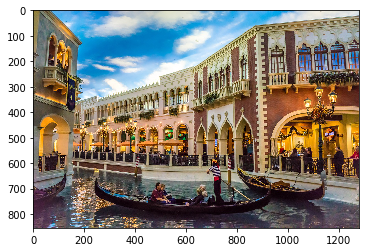

In [0]:
!ls "/content/drive/My Drive/Colab Notebooks/datasets"

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/datasets/boat-types-recognition_reduced/train/gondola/venetian-las-vegas-gondola-canal-archite-562762.jpg', 'r')
imshow(np.asarray(pil_im))

In [0]:
import tensorflow as tf

tf.test.gpu_device_name()

'/device:GPU:0'

Catch the dataset from Google Drive and make differents ImageDataGenerator for train and test. The final datagens have 4 classes with 128px, 128px images.

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from time import time


# DATA SOURCE --------------------------------------------------

batch_size = 16
train_data_dir = '/content/drive/My Drive/Colab Notebooks/datasets/boat-types-recognition_reduced/train'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/datasets/boat-types-recognition_reduced/test'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(128, 128),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Using TensorFlow backend.


Found 854 images belonging to 4 classes.
Found 369 images belonging to 4 classes.


In [0]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras

# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(128, (5, 5),
             input_shape=(128, 128, 3),
             activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.Adam(lr=0.001),
            metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Here is the resume of the model.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 124, 128)     9728      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
__________

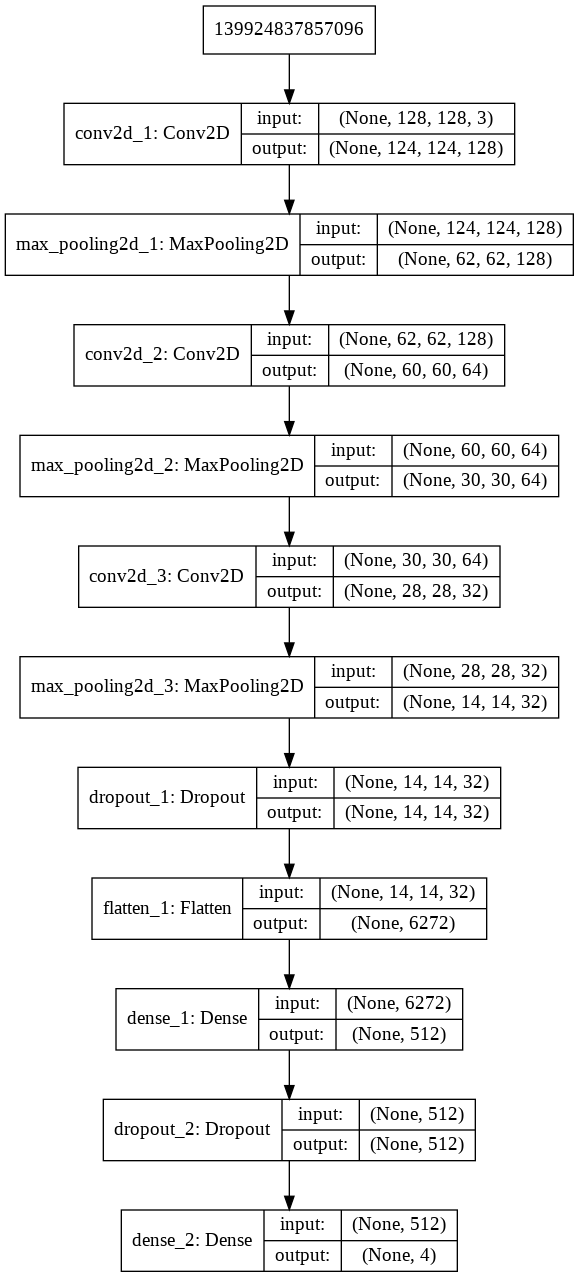

In [0]:
from keras.utils import plot_model

model.summary()
plot_model(model, to_file='./drive/My Drive/Colab Notebooks/model_plot2.png', show_shapes=True, show_layer_names=True)

Image.open('/content/drive/My Drive/Colab Notebooks/model_plot2.png')

Now, I train and test the model,  using 50 epochs with 53 steps for training and 11 for the test. I load the result in a variable named hist.

In [0]:
# TRAINING --------------------------------------------------

epochs = 50
hist = model.fit_generator(
        train_generator,
        steps_per_epoch=849//batch_size,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=368//32,
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
53/53 [==============================] - 33s 632ms/step - loss: 1.3685 - acc: 0.3762 - val_loss: 1.3249 - val_acc: 0.3953
Epoch 2/50
53/53 [==============================] - 28s 524ms/step - loss: 1.3225 - acc: 0.3986 - val_loss: 1.2826 - val_acc: 0.3994
Epoch 3/50
53/53 [==============================] - 27s 508ms/step - loss: 1.2794 - acc: 0.4084 - val_loss: 1.1762 - val_acc: 0.4518
Epoch 4/50
53/53 [==============================] - 28s 529ms/step - loss: 1.2455 - acc: 0.4367 - val_loss: 1.1399 - val_acc: 0.4844
Epoch 5/50
53/53 [==============================] - 26s 498ms/step - loss: 1.2244 - acc: 0.4398 - val_loss: 1.1409 - val_acc: 0.5227
Epoch 6/50
53/53 [==============================] - 26s 495ms/step - loss: 1.1606 - acc: 0.5000 - val_loss: 1.0428 - val_acc: 0.5467
Epoch 7/50
53/53 [==============================] - 28s 519ms/step - loss: 1.1775 - acc: 0.4945 - val_loss: 1.0410 - val_acc: 0.5241
Epoch 8/50
53/53 [===

To sum up, I represent in a plot the accuracy and the loss values from training and testing to compare it.

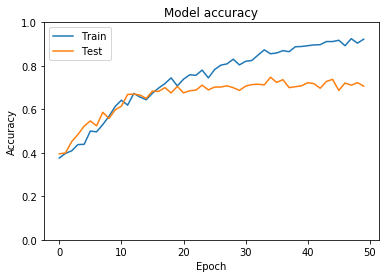

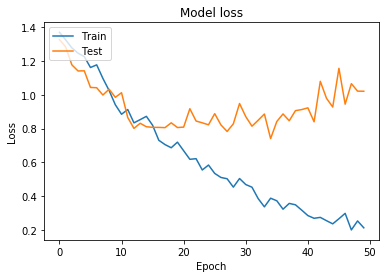

In [0]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0,1)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()